# Outliars Detection and Normality Study

In [ ]:
Outliars bring us not Normal Distrib and low prediction score

# Few ways for solve problem with Outliars and Normality

1. Data Transformation (log, box_cox,etc.).
As well it will reduce outliars` influence.

2. Outliar Detection and Remove
    - Box-Plot
    - Scatter
    - Z-score (number of std by which data point differ from mean,threshold of 3 or -3  usually used)
    - Q3-Q1

# Transformation

In [ ]:
# Distribution Study

In [ ]:
Why Transformation is needed?
    Data doesnt follow normal distribution and it is required for more accurate linear prediction

In [ ]:
3 main types of Transformation

1. Log (often)
2. Square Root
3. Reciprocal (often)

else
cube root


As well less point in distr - easier to make them normal
Power?


Negative Sk - tail to left
Log - Log10, Ln , Log 2

Can not be apply to 0 or Negative

Log10 usuallu used for positive or highly right skewed

Inverse


In [ ]:
Usually checking Hypothesis we want p-val less 0.05
However during checking Normal Distribution situation
is opposite - to prove Normal Distribution we need to have p-val more than 0.05 (or 0.01)!

In [ ]:
We need to check Normality - different Tests.
1. Kolmogorov-Smirnov
2. Shapiro-Wilk

In [ ]:
# Log

In [141]:
# Create Skewed Dist
import numpy as np
import pandas as pd
from scipy.stats import skewnorm


import scipy
from scipy.stats import shapiro
from scipy.stats import kstest

import matplotlib.pyplot as plt

numValues = 100
maxValue = 100
skewness = 5   #Negative values are left skewed, positive values are right skewed.

random = skewnorm.rvs(a = skewness,loc=maxValue, size=numValues)  #Skewnorm function

random = random - min(random)      #Shift the set so the minimum value is equal to zero.
random = random / max(random)      #Standadize all the vlues between 0 and 1. 
random = random * maxValue         #Multiply the standardized values by the maximum value.
random=random+2


In [142]:
def charts(df):
    #Plot histogram to check skewness
    fig=plt.figure(figsize=(10,8))
    sub1=fig.add_subplot(221)
    sub1.hist(df,30,density=True, color = 'red', alpha=0.3)
    sub2=fig.add_subplot(222)
    #random=pd.DataFrame(random)
    sub2.boxplot(df)
    plt.show()
    

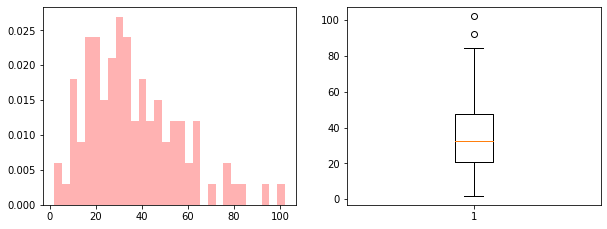

In [143]:
charts(random)

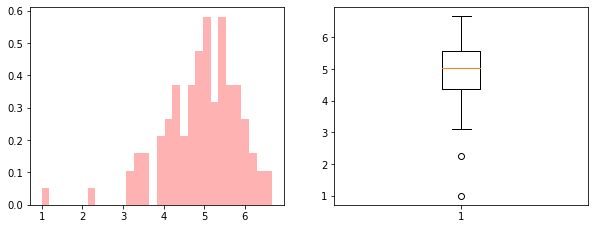

In [144]:
#Log or log1p or log2
log_tr=np.log2(random)
charts(log_tr)

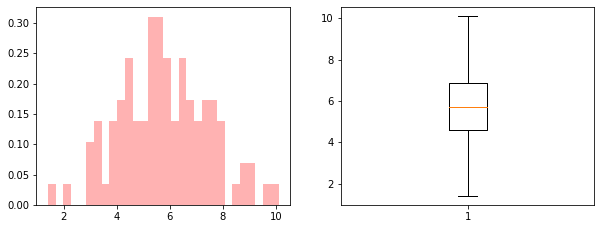

In [145]:
#Sqrt
sqrt_tr=np.sqrt(random)
charts(sqrt_tr)

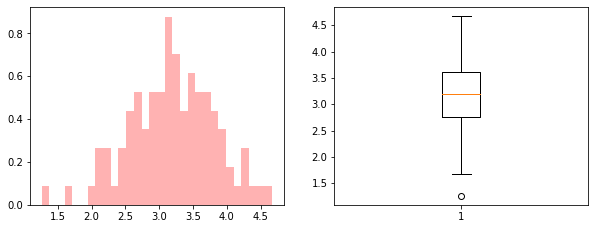

In [146]:
#Qube RooT
qube_tr=(random)**(1/3)
charts(qube_tr)

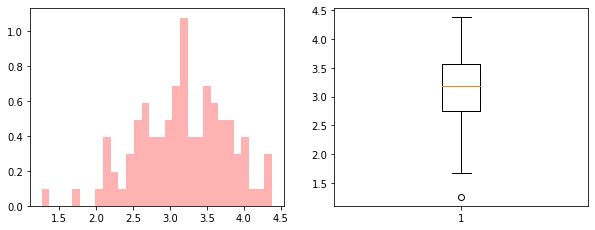

In [179]:
#Qube RooT
charts(Q_tr[0])

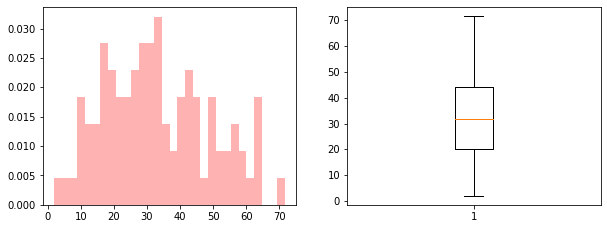

In [185]:
charts(random_z[0])

In [187]:

for i in [random,log_tr,sqrt_tr,qube_tr,Q_tr[0],random_z[0]]:
    stat, p = shapiro(i)
    print('statistics=%.3f, p=%.5f' % (stat, p))

statistics=0.950, p=0.00089
statistics=0.949, p=0.00070
statistics=0.996, p=0.99323
statistics=0.994, p=0.95880
statistics=0.988, p=0.52653
statistics=0.978, p=0.10796


In [189]:

for i in [random,log_tr,sqrt_tr,qube_tr,Q_tr[0],random_z[0]]:
    stat, p = kstest(i, 'norm')
    print('statistics=%.3f, p=%.5f' % (stat, p))


statistics=1.000, p=0.00000
statistics=0.979, p=0.00000
statistics=0.978, p=0.00000
statistics=0.960, p=0.00000
statistics=0.960, p=0.00000
statistics=0.989, p=0.00000


# Outliers Search

## Z-score

In [190]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(random))
#print(z)


In [182]:
# 1 element - 99 has >3 z_score
threshold = 2
print(np.where(z > 2))

(array([17, 20, 60, 65, 77, 99], dtype=int64), array([0, 0, 0, 0, 0, 0], dtype=int64))


In [169]:
#print(z[55][1])

print(z[99])

[3.29519021]


In [170]:
# drop Oupl

In [183]:
random_z = random[(z < 2).all(axis=1)]
random_z.shape

(94, 1)

## IQR score - interquartile range (IQR), also called the midspread or middle 50%,

In [172]:
df_random=pd.DataFrame(random)

In [173]:
#difference of dispersion between 25% 75% Quantile
Q1 = df_random.quantile(0.25)
Q3 = df_random.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0    26.494155
dtype: float64


In [174]:
# Check Outl
#The data point where we have 
#False that means these values are valid whereas True indicates presence of an outlier.

print(df_random < (Q1 - 1.5 * IQR)) |(df_random > (Q3 + 1.5 * IQR))

        0
0   False
1   False
2   False
3   False
4   False
..    ...
95  False
96  False
97  False
98  False
99  False

[100 rows x 1 columns]


TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [175]:
#filter out
#2 values Dropped (the same on BoxPlot)
random_Q = df_random[~((df_random < (Q1 - 1.5 * IQR)) |(df_random > (Q3 + 1.5 * IQR))).any(axis=1)]
random_Q.shape

(98, 1)